<a href="https://colab.research.google.com/github/Yuvraj-Badmal/Medical_Insurance_Price_Prediction_Using_ML/blob/main/Medical_Insurance_Price_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Insurance Price Prediction using Machine Learning**

### **We have heard some advertisements regarding medical insurance that promises to help financially in case of any medical emergency. One who purchases this type of insurance has to pay premiums monthly(quarterly,half yearly) and this premium amount varies vastly depending upon various factors.**

### **The medical insurance dataset contains information about a number of factors that can affect medical expenses, including age, sex, BMI, smoking status, number of children, and region. This dataset can be used to train a machine learning model that can predict medical expenses for new customers.To provide insights into the key factors that contribute to higher insurance costs and help the company make more informed decisions regarding pricing and risk assessment.**

## **Importing Libraries and Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Medical_insurance.csv to Medical_insurance.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Medical_insurance.csv']))
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


### **This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### **From the above, we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.**

##  **Descriptive Statistical Measures of the continuous data available in the dataset.**

In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


# **Exploratory Data Analysis**


## **While performing the EDA of this dataset we will also try to look at what is the relation between the independent features that is how one affects the other.**

In [ ]:
#We can conclude that there are no null values in the dataset given.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

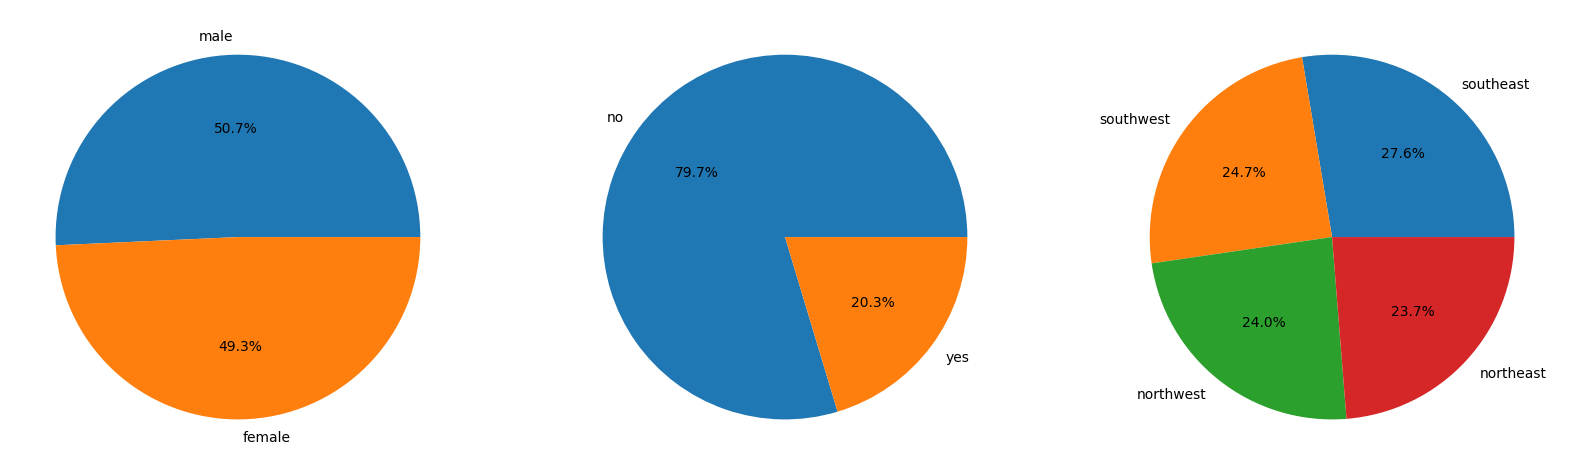

In [ ]:
#Pie-chart for the sex, smoker, and region column

features = ['sex','smoker','region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,labels=x.index,autopct='%1.1f%%')

plt.show()

### **As we can see data is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.**

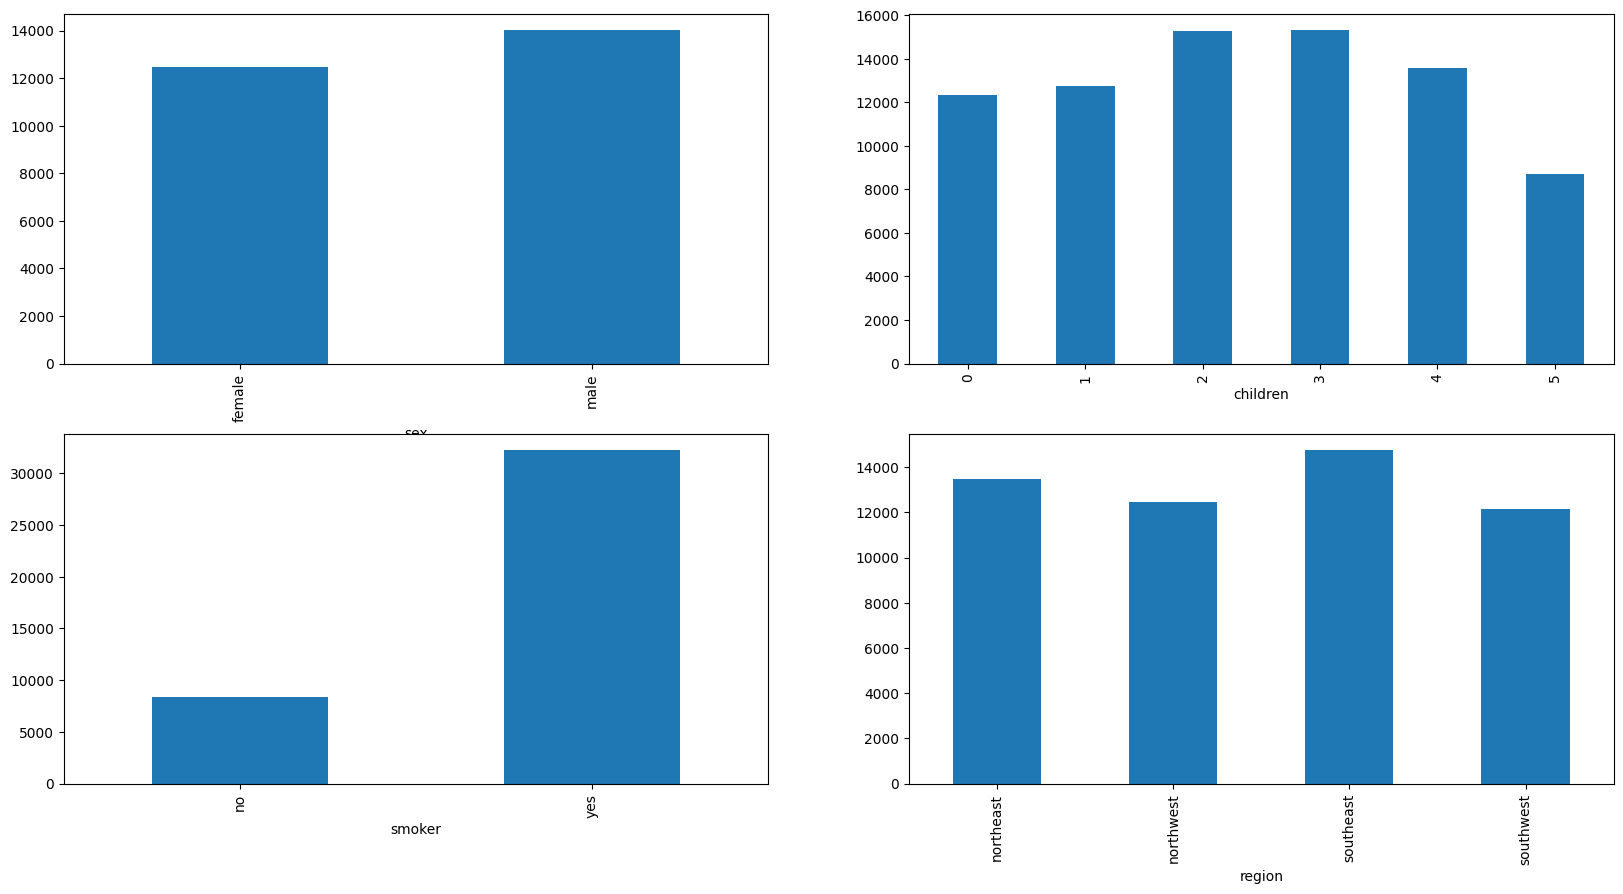

In [ ]:
#Comparison between charges paid between different groups

features_1 = ['sex','children', 'smoker', 'region']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features_1):
    plt.subplot(2, 2, i + 1)
    # Convert 'charges' to numeric, handling errors
    df['charges'] = pd.to_numeric(df['charges'], errors='coerce')
    df.groupby(col)['charges'].apply(lambda x: x.dropna().mean()).plot.bar()
plt.show()

### **Charges are on the higher side for males as compared to females but the difference is not that much.**
### **Premium charged from the smoker is around thrice that which is charged from non-smokers.**
### **Charges are approximately the same in the given four regions.**

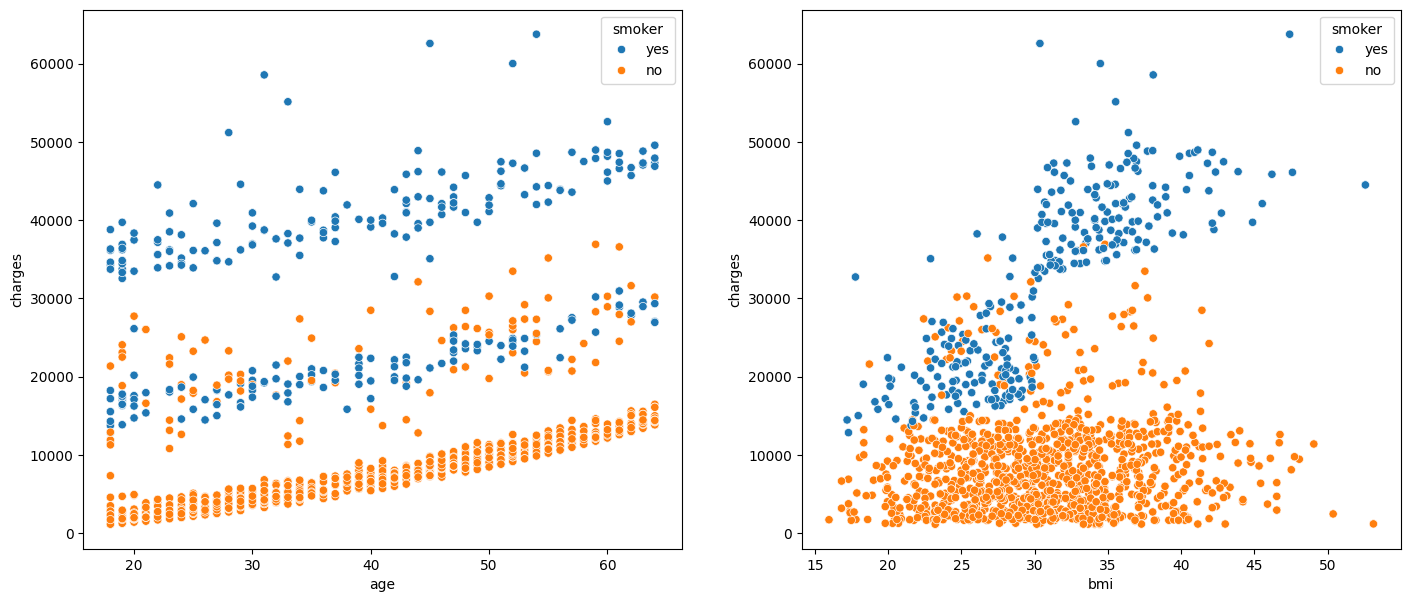

In [ ]:
#Scatter plot of the charges paid v/s age and BMI respectively

features_2 = ['age','bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features_2):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker')
plt.show()

### **Clear distinction can be observed here between the charges that smokers have to pay as compared to others. Also here as well we can observe that as the age of a person increases premium prices goes up as well.**

# **DATA PREPROCESSING**

## **In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.**

<Axes: ylabel='age'>

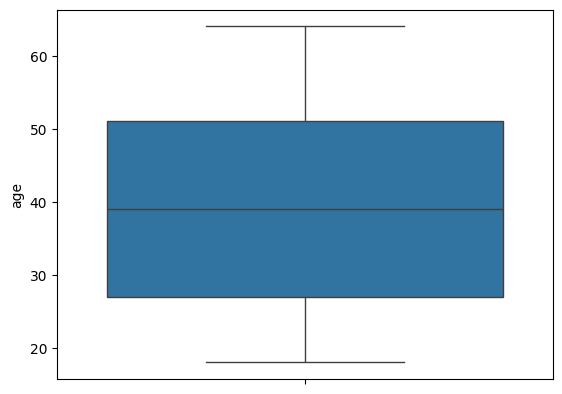

In [ ]:
df.drop_duplicates(inplace=True)

sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

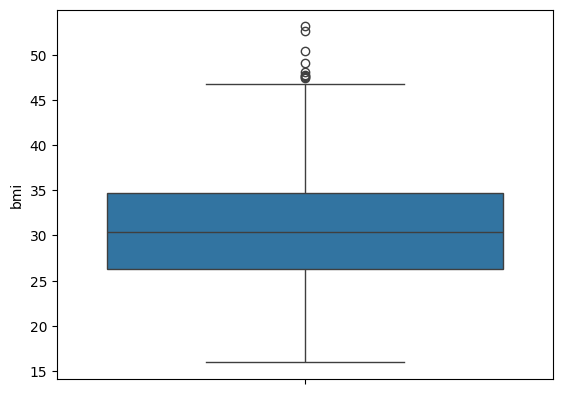

In [ ]:
sns.boxplot(df['bmi'])

### **We can see presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.**

## **We will use IQR method here to treat the outliers and checkout the range.**

In [ ]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1

lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr

print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 72.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


<Axes: ylabel='bmi'>

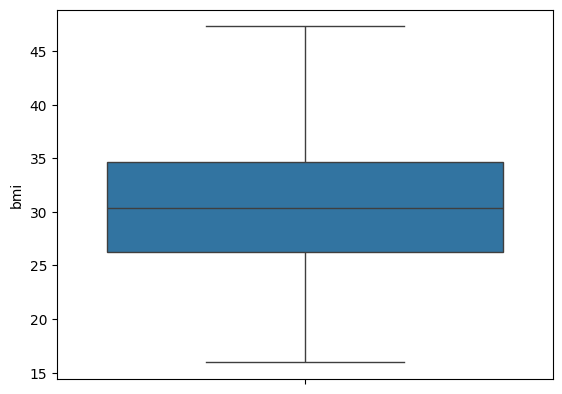

In [ ]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

# **Data Wrangling**

## **To ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.**

## **Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.**

In [ ]:
df['bmi'].skew()


0.23289153320569975

In [ ]:
df['age'].skew()

0.054780773126998195

# **Encoding**

### **To be done for discrete categorical data (sex,bmi,region)**

In [ ]:
df['sex'] = df['sex'].map({'male':0,'female':1})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'northwest':0, 'northeast':1, 'southeast':2, 'southwest':3})


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


# **Model Development**

In [ ]:
X = df.drop(['charges'],axis = 1)
Y = df[['charges']]

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split,cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0

for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel = LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)

In [ ]:
df1 = pd.DataFrame({'train_acc':l1,'test_acc':l2,'cvs':l3})
df1

,train_acc,test_acc,cvs
0,0.741659,0.778409,0.74707
1,0.756401,0.706267,0.74707
2,0.729542,0.806239,0.74707
3,0.754260,0.732791,0.74707
4,0.742966,0.779591,0.74707
5,0.753281,0.731769,0.74707
6,0.741261,0.776456,0.74707
7,0.731940,0.796173,0.74707
8,0.751915,0.741742,0.74707
9,0.756348,0.722565,0.74707


## **We have identified the best random_state number for this data set as 42 .Now we fix this random_state and try with different ml algorithms for better score or accuracy.**

### **Linear Regression**

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

0.7295415541376445
0.806239111557059
0.7470697972809902


## **SVR**

In [ ]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)

print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))

print(cross_val_score(svrmodel,X,Y,cv=5,).mean())


-0.10151474302536445
-0.1344454720199666
-0.10374591327267262


## **Random Forest Regressor**

In [ ]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

print('***********************************************************')

from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

print('***********************************************************')

0.9738163260247533
0.8819423353068565
0.8363637309718952
***********************************************************
{'n_estimators': 120}
***********************************************************


In [ ]:
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

0.9746383984429655
0.8822009842175969
0.8367438097052858


## **Gradient Boosting Regressor**

In [ ]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

print('***********************************************************')


from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

print('***********************************************************')

0.8931345821166041
0.9042606828739006
0.8551468210820492
***********************************************************
{'learning_rate': 0.2, 'n_estimators': 19}
***********************************************************


In [ ]:
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

0.8682397447116927
0.9017109716082662
0.8606041910125791


## **XGB Regressor**

In [ ]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

print('***********************************************************')


from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

print('***********************************************************')

0.9954123497009277
0.8548938035964966
0.8081253051757813
***********************************************************
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
***********************************************************


In [ ]:
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.869317352771759
0.9022461175918579
0.8607115387916565


## **From the above data and findings we can observe that XGBoost is the best model.Now we need to identify the important features for predicting of charges.**

In [ ]:
imp_feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
imp_feats


,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


# **Final Model**

In [ ]:
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)

ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)

print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())


0.8691051602363586
0.9007425308227539
0.8606266975402832


**The XGBoost model, after thorough exploration and tuning, was identified as the most effective for predicting medical insurance charges based on the given dataset. Also the model's feature importances provide insights into the factors that significantly influence insurance costs.**

# **Predict on new data:**

In [ ]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)

In [ ]:
finalmodel.predict(new_data)

array([18035.828], dtype=float32)

### **Finalmodel.predict(new_data) returns an array containing the predicted medical insurance charges for the individual described in the 'new_data' DataFrame. In this specific case, the predicted insurance charge is approximately 18035.828**
### **This predicted value represents the estimated medical insurance charge for a person with the given age, BMI, smoking status, and other features in the 'new_data' DataFrame.**
